## Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

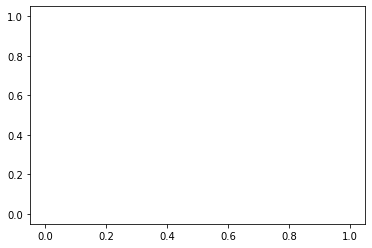

In [2]:
plt.plot()

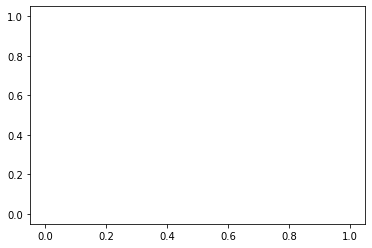

In [3]:
plt.plot(); #add ; to remove []

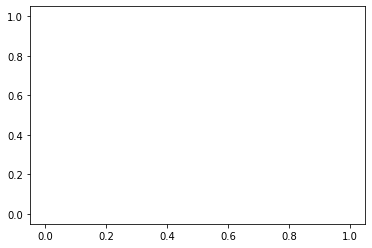

In [4]:
plt.plot()
plt.show()

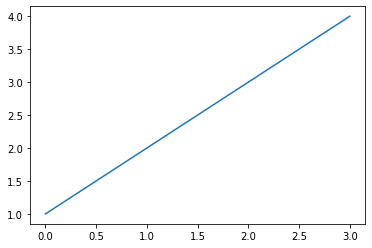

In [5]:
plt.plot([1, 2, 3, 4]) # assume x = [0, 1, 2, 3]

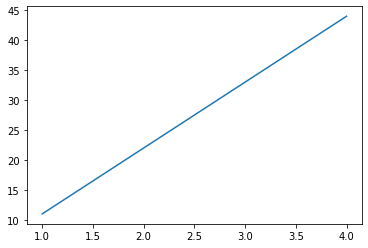

In [6]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y)

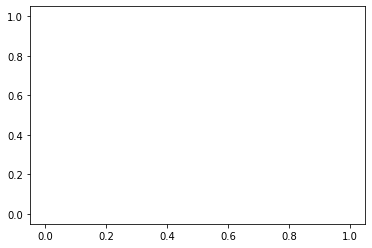

In [7]:
plt.plot();

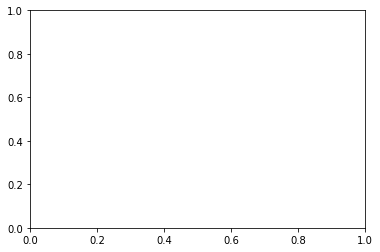

In [8]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

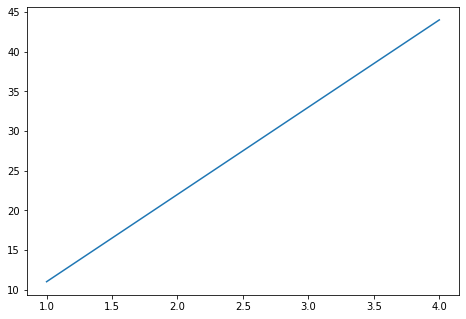

In [9]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y) # add some data
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

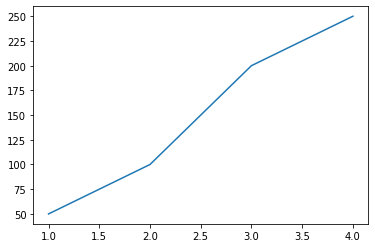

In [10]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]); # add some data
type(fig), type(ax)

# Matplotlib example workflow

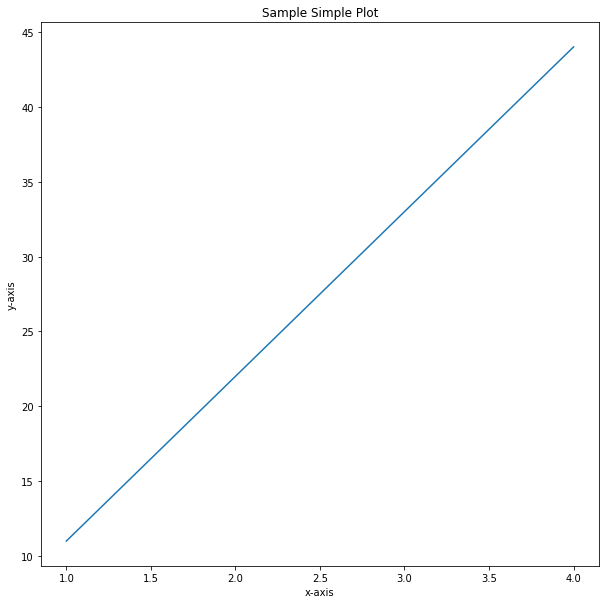

In [11]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("images/simple-plot.png")

<img src="images/anatomy-of-a-matplotlib-plot-1.png" />

<img src="images/anatomy-of-a-matplotlib-plot-2.png" />

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [12]:
import numpy as np

In [16]:
# Create an array
x = np.linspace(0, 10, 100)
x[0:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

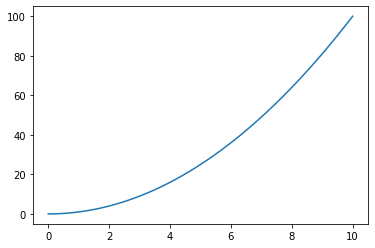

In [18]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

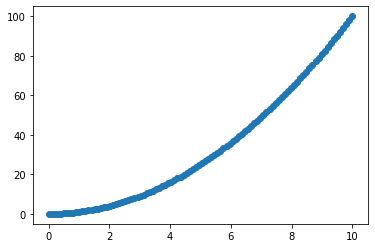

In [23]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

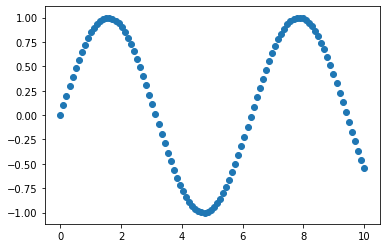

In [24]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

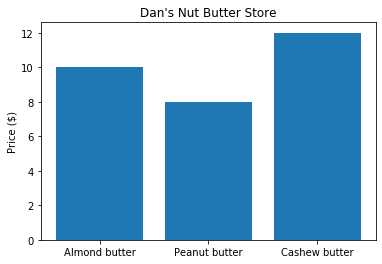

In [25]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");